Mounting google drive, where the data is saved

In [15]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
import tensorflow as tf

## Load data

In [17]:
# Load DataFrame back from HDF5 file
df = pd.read_hdf('/content/drive/My Drive/AI4EIC_hackathon/data_AI4EIC_Q1.h5', key='data_new')

df.head()

,eventID,PID,momentum,theta,phi,image
0,0.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3.0,0,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4.0,0,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [18]:

length = len(df)

images = np.stack(df['image'].to_numpy()).reshape(length,128,128)
print(images.shape)

labels = np.array(df["PID"]).reshape(length,1)
print(labels.shape)


(1000, 128, 128)
(1000, 1)


## Train Test Split

In [19]:

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

## CNN Model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(filters = 32,kernel_size =(7,7),strides=(1, 1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1, activation='sigmoid')
    ])

model.compile(
  'adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 134, 134, 1)       0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      1600      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                      

## Traning the Model

In [21]:
# model.fit(X_train, y_train, epochs=3, validation_data=( X_test, y_test))
model.fit(X_train, y_train, epochs=3, batch_size=16)

Epoch 1/3
57/57 [==============================] - 21s 355ms/step - loss: 0.1443 - accuracy: 0.9578
Epoch 2/3
57/57 [==============================] - 22s 385ms/step - loss: 0.0018 - accuracy: 0.9989
Epoch 3/3
57/57 [==============================] - 21s 356ms/step - loss: 0.0010 - accuracy: 1.0000


In [22]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 141ms/step - loss: 0.2787 - accuracy: 1.0000


[0.27872806787490845, 1.0]

In [23]:
# Save the model to disk.
model.save_weights('/content/drive/My Drive/AI4EIC_hackathon/Q1/MyModel/AI4EIC_Q1_My_CNN_weights.h5')
model.save('/content/drive/My Drive/AI4EIC_hackathon/Q1/MyModel/AI4EIC_Q1_My_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


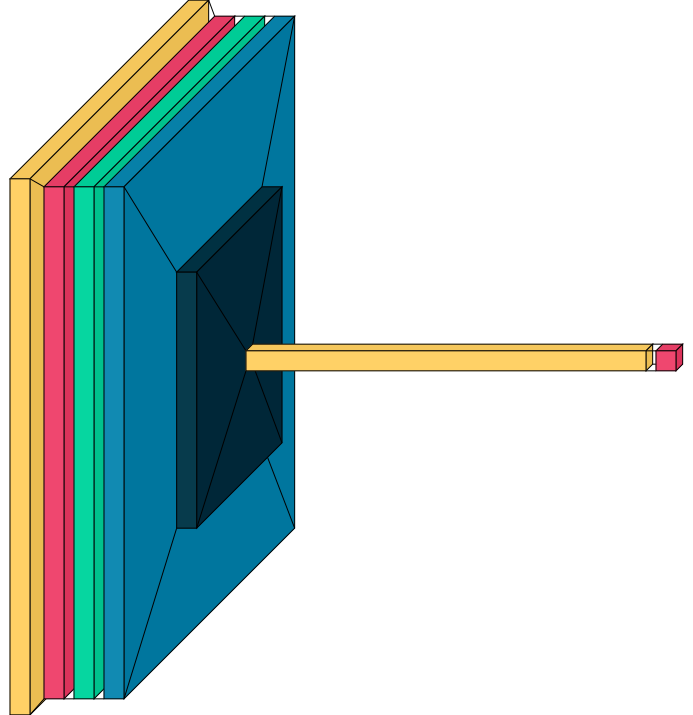

In [24]:
import visualkeras
visualkeras.layered_view(model)

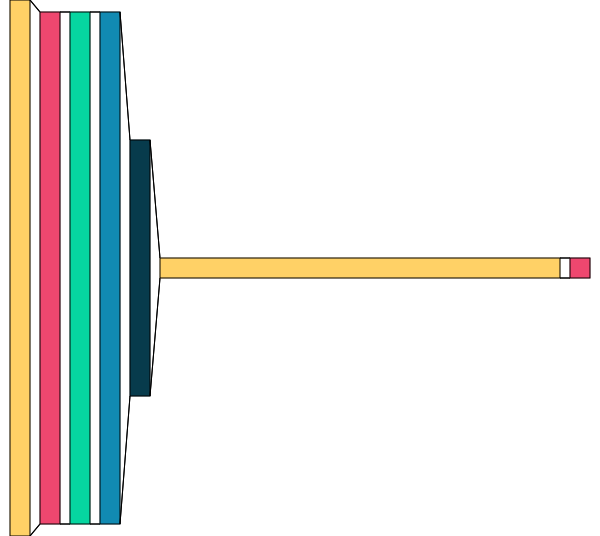

In [25]:
visualkeras.layered_view(model, draw_volume=False)